In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Pass in MySQL Connection
conn = engine.connect()

# Create measurement dataframe
mdata1 = pd.read_sql("SELECT * FROM Measurement", conn)

# Create station dataframe
sdata1 = pd.read_sql("SELECT * FROM Station", conn)

In [11]:
# Determine most recent date
print((mdata1['date'].max()))

2017-08-23


In [29]:
# Select only the last 12 months of data
mdata2 = mdata1[(mdata1['date'] >= '2016-08-23') & (mdata1['date'] <= '2017-08-23')]

In [13]:
# Isolate only date and precip columns
mdata3 = mdata2[['date','prcp']]

In [14]:
# Set date as index
mdata4 = mdata3.set_index('date')

In [15]:
# Sort by date
mdata5 = mdata4.sort_index()

In [16]:
# Drop rows with missing values
mdata6 = mdata5.dropna()

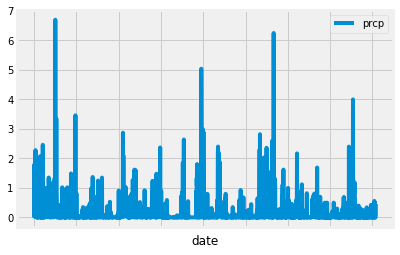

In [27]:
# Create bar graph
mdata6.plot();

In [18]:
# Calculate summary statistics
mdata6.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset?
len(sdata1['station'].unique())

9

In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
mdata1['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
print(mdata1.loc[mdata1['station'] == 'USC00519281', 'tobs'].min())
print(mdata1.loc[mdata1['station'] == 'USC00519281', 'tobs'].max())
print(mdata1.loc[mdata1['station'] == 'USC00519281', 'tobs'].mean())

54.0
85.0
71.66378066378067


In [22]:
# Filter results by desired station
mdata7 = mdata1.loc[mdata1['station'] == 'USC00519281']

In [23]:
# Determine most recent date
print((mdata7['date'].max()))

2017-08-18


In [24]:
# Filter last 12 months of data
mdata8 = mdata7[(mdata7['date'] >= '2016-08-18') & (mdata7['date'] <= '2017-08-18')]

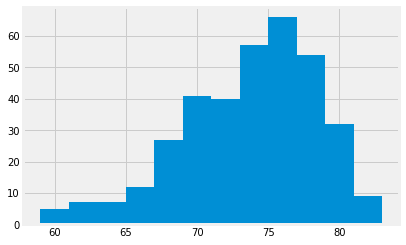

In [25]:
# Display plot with bins
ax = plt.hist(mdata8['tobs'],bins=12,histtype='bar')